In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catch22 import catch22_all
import scipy.ndimage as ndimage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import palettable
from pathlib import Path

In [4]:
home = Path('R:/home')
top_dir = Path(home, 'firefly_link/cancer')
data_dir = Path(top_dir, "analysis", "full")
tc_save = Path(data_dir, 'long_acqs_20230207_HPC_labelled_complete_intermediate_files','caffeine')
csv_filenames = []
lines = ['caffeine']
for line in lines:
    csv_filenames.append(str(Path(tc_save, f'active_tcs_filt_20230207_{line}_pre_qcd.csv')))
    csv_filenames.append(str(Path(tc_save, f'active_tcs_filt_20230207_{line}_post_qcd.csv')))
    tcs = pd.concat((pd.read_csv(f,index_col = [0]) for f in csv_filenames))
    tcs.index = np.arange(tcs.shape[0])
    #print(tcs)
tcs.insert(1,'stage','pre')

In [5]:
tcs

,expt,stage,cell_id_active,0,1,2,3,4,5,6,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
0,caffeine,pre,cancer_20221128_slip2_area1_long_acq_cancer202...,1.001653,1.001605,1.001489,1.001287,1.001006,1.000686,1.000382,...,0.999022,0.999283,0.999560,0.999794,0.999949,1.000024,1.000047,1.000047,1.000044,1.000044
1,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,1.001019,1.001122,1.001288,1.001439,1.001470,1.001284,1.000838,...,1.000196,0.999775,0.999332,0.998952,0.998708,0.998639,0.998728,0.998911,0.999100,0.999218
2,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,1.005816,1.005762,1.005638,1.005438,1.005191,1.004963,1.004839,...,1.000515,1.000519,1.000482,1.000417,1.000355,1.000314,1.000291,1.000273,1.000253,1.000239
3,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,0.998969,0.998887,0.998766,0.998661,0.998603,0.998578,0.998543,...,1.001295,1.001404,1.001592,1.001843,1.002083,1.002222,1.002208,1.002060,1.001863,1.001727
4,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,1.000242,1.000131,0.999898,0.999543,0.999104,0.998665,0.998328,...,0.999127,0.999150,0.999116,0.999037,0.998925,0.998788,0.998640,0.998498,0.998385,0.998321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,caffeine,pre,cancer_20221203_slip2_area2_long_acq_cancer202...,0.996865,0.997457,0.998559,1.000018,1.001639,1.003227,1.004617,...,1.001338,1.001777,1.002136,1.002446,1.002757,1.003100,1.003458,1.003783,1.004024,1.004150
605,caffeine,pre,cancer_20221203_slip2_area2_long_acq_cancer202...,1.002259,1.002298,1.002370,1.002458,1.002534,1.002555,1.002475,...,1.000964,1.001172,1.001404,1.001665,1.001952,1.002251,1.002537,1.002778,1.002950,1.003038
606,caffeine,pre,cancer_20221203_slip2_area2_long_acq_cancer202...,1.003366,1.003400,1.003433,1.003415,1.003315,1.003135,1.002916,...,0.997709,0.997705,0.997665,0.997582,0.997465,0.997343,0.997252,0.997210,0.997207,0.997218
607,caffeine,pre,cancer_20221203_slip2_area3_long_acq_cancer202...,1.001147,1.001127,1.001091,1.001039,1.000964,1.000852,1.000693,...,0.999874,0.999608,0.999383,0.999245,0.999208,0.999271,0.999413,0.999601,0.999780,0.999891


In [9]:
for i in range(tcs.shape[0]):
    if 'pre' in(tcs.cell_id_active[i]):
        tcs.stage[i] = 'pre'
    elif 'post' in(tcs.cell_id_active[i]):
        tcs.stage[i] = 'post'
tcs

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,expt,stage,cell_id_active,0,1,2,3,4,5,6,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
0,caffeine,pre,cancer_20221128_slip2_area1_long_acq_cancer202...,1.001653,1.001605,1.001489,1.001287,1.001006,1.000686,1.000382,...,0.999022,0.999283,0.999560,0.999794,0.999949,1.000024,1.000047,1.000047,1.000044,1.000044
1,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,1.001019,1.001122,1.001288,1.001439,1.001470,1.001284,1.000838,...,1.000196,0.999775,0.999332,0.998952,0.998708,0.998639,0.998728,0.998911,0.999100,0.999218
2,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,1.005816,1.005762,1.005638,1.005438,1.005191,1.004963,1.004839,...,1.000515,1.000519,1.000482,1.000417,1.000355,1.000314,1.000291,1.000273,1.000253,1.000239
3,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,0.998969,0.998887,0.998766,0.998661,0.998603,0.998578,0.998543,...,1.001295,1.001404,1.001592,1.001843,1.002083,1.002222,1.002208,1.002060,1.001863,1.001727
4,caffeine,pre,cancer_20221203_slip1_area2_long_acq_cancer202...,1.000242,1.000131,0.999898,0.999543,0.999104,0.998665,0.998328,...,0.999127,0.999150,0.999116,0.999037,0.998925,0.998788,0.998640,0.998498,0.998385,0.998321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,caffeine,post,cancer_20221203_slip2_area2_long_acq_cancer202...,0.996865,0.997457,0.998559,1.000018,1.001639,1.003227,1.004617,...,1.001338,1.001777,1.002136,1.002446,1.002757,1.003100,1.003458,1.003783,1.004024,1.004150
605,caffeine,post,cancer_20221203_slip2_area2_long_acq_cancer202...,1.002259,1.002298,1.002370,1.002458,1.002534,1.002555,1.002475,...,1.000964,1.001172,1.001404,1.001665,1.001952,1.002251,1.002537,1.002778,1.002950,1.003038
606,caffeine,post,cancer_20221203_slip2_area2_long_acq_cancer202...,1.003366,1.003400,1.003433,1.003415,1.003315,1.003135,1.002916,...,0.997709,0.997705,0.997665,0.997582,0.997465,0.997343,0.997252,0.997210,0.997207,0.997218
607,caffeine,post,cancer_20221203_slip2_area3_long_acq_cancer202...,1.001147,1.001127,1.001091,1.001039,1.000964,1.000852,1.000693,...,0.999874,0.999608,0.999383,0.999245,0.999208,0.999271,0.999413,0.999601,0.999780,0.999891


In [10]:
#Feature Extraction
features=[]
for i in range(tcs.shape[0]):
    df=tcs.iloc[i,3:]
    #Feature Extraction
    catch22_out=catch22_all(df)['values']
    features.append(catch22_out)
#values=features['values'].apply(pd.Series)
features = pd.DataFrame(features)
features.columns=['DN_HistogramMode_5','DN_HistogramMode_10','CO_f1ecac','CO_FirstMin_ac','CO_HistogramAMI_even_2_5','CO_trev_1_num','MD_hrv_classic_pnn40','SB_BinaryStats_mean_longstretch1','SB_TransitionMatrix_3ac_sumdiagcov','PD_PeriodicityWang_th0_01','CO_Embed2_Dist_tau_d_expfit_meandiff','IN_AutoMutualInfoStats_40_gaussian_fmmi','FC_LocalSimple_mean1_tauresrat','DN_OutlierInclude_p_001_mdrmd','DN_OutlierInclude_n_001_mdrmd','SP_Summaries_welch_rect_area_5_1','SB_BinaryStats_diff_longstretch0','SB_MotifThree_quantile_hh','SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1','SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1','SP_Summaries_welch_rect_centroid','FC_LocalSimple_mean3_stderr']
features

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
0,-0.230630,0.092984,33,41,0.657382,0.000275,0.778511,171.0,0.006818,51,...,0.037037,-0.308962,-0.401080,0.996994,30.0,1.415510,0.163265,0.836735,0.031447,0.285343
1,-0.184789,-0.524435,136,408,0.732323,0.000063,0.629252,379.0,0.004167,843,...,0.020921,-0.718244,-0.261052,0.998933,30.0,1.349709,0.163265,0.795918,0.007670,0.160529
2,0.170045,-0.137659,134,45,0.758869,0.000028,0.733693,559.0,0.028835,681,...,0.017241,-0.811762,-0.095019,0.997369,26.0,1.361004,0.122449,0.836735,0.008437,0.223360
3,-0.493682,0.581789,97,48,0.657426,0.000117,0.762105,238.0,0.002894,56,...,0.024390,0.058312,-0.404481,0.997023,31.0,1.400732,0.163265,0.755102,0.011505,0.254964
4,0.422588,0.004975,36,58,0.572834,-0.000252,0.764306,151.0,0.001736,147,...,0.024155,-0.023205,0.048010,0.997761,25.0,1.395745,0.244898,0.673469,0.030680,0.258075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,1.002583,0.715943,9,20,0.654224,-0.000299,0.681873,162.0,0.001753,36,...,0.437500,-0.332066,-0.246449,0.998792,34.0,1.411794,0.306122,0.183673,0.118117,0.318694
605,0.548915,-0.433127,54,42,0.652543,-0.000137,0.780312,264.0,0.008074,84,...,0.017794,-0.433287,-0.360472,0.997475,30.0,1.423440,0.163265,0.836735,0.023010,0.278243
606,0.262702,-0.129457,70,35,0.572498,-0.000180,0.769108,279.0,0.021667,43,...,0.020833,0.016003,0.487097,0.996447,27.0,1.410825,0.163265,0.734694,0.014573,0.269439
607,0.625623,0.155672,13,15,0.453193,0.000465,0.814926,107.0,0.011905,19,...,0.028409,-0.087017,0.041508,0.996109,23.0,1.461153,0.183673,0.775510,0.058291,0.336117


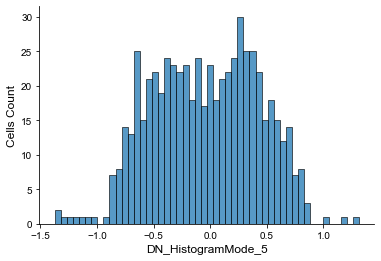

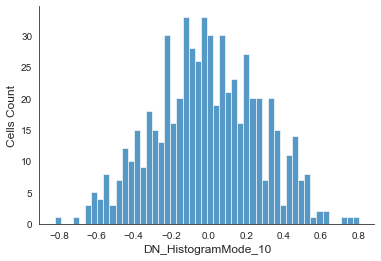

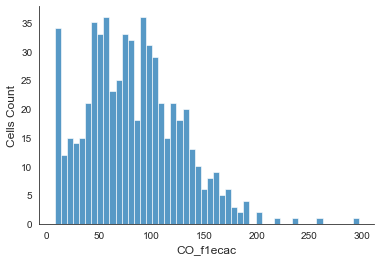

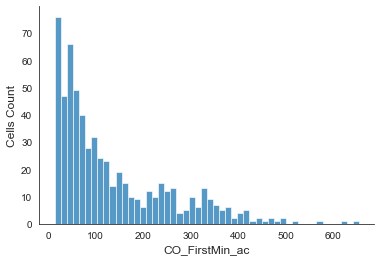

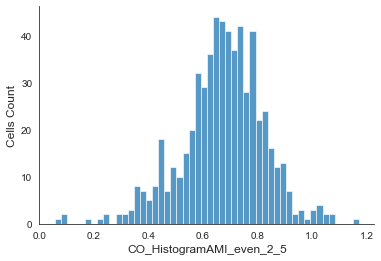

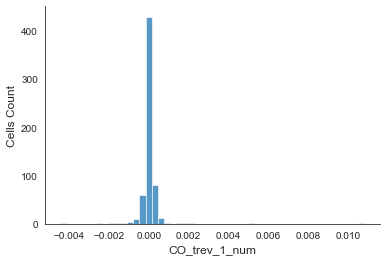

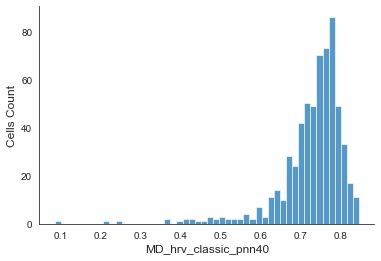

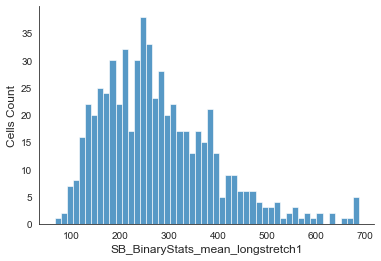

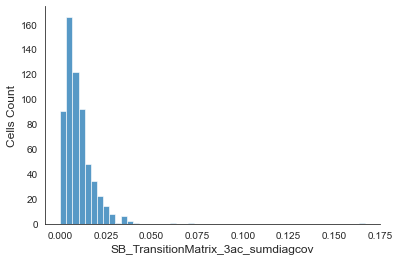

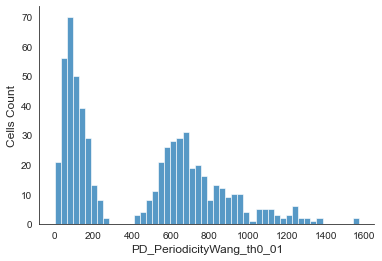

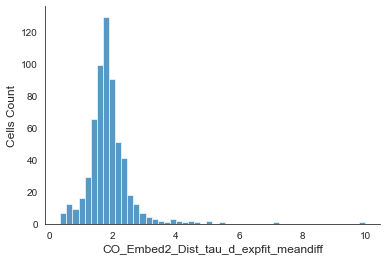

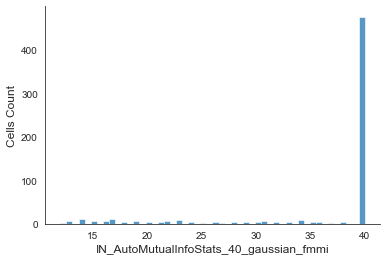

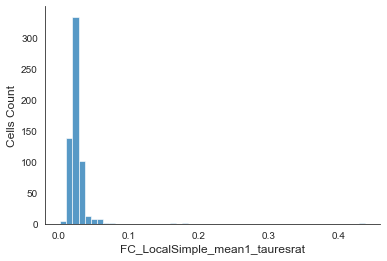

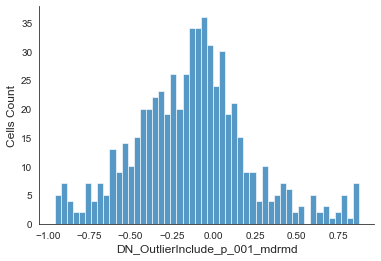

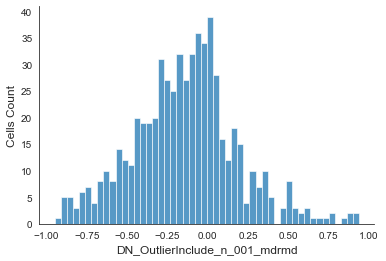

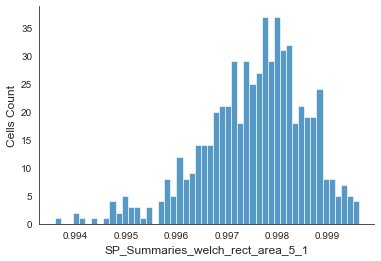

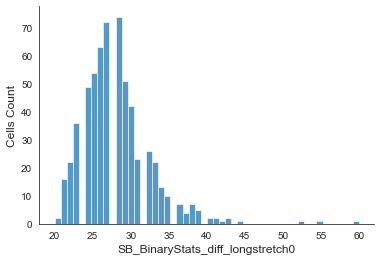

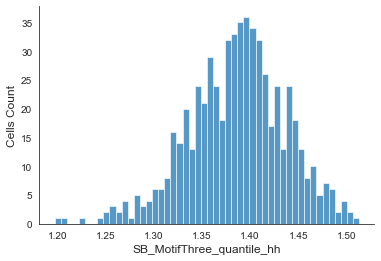

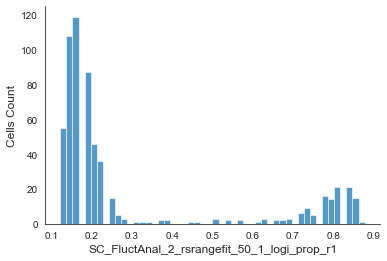

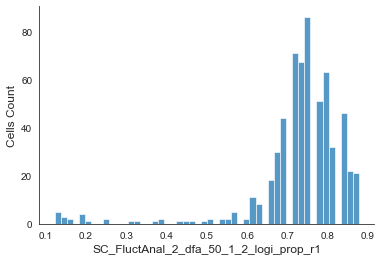

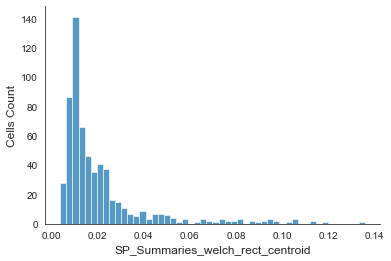

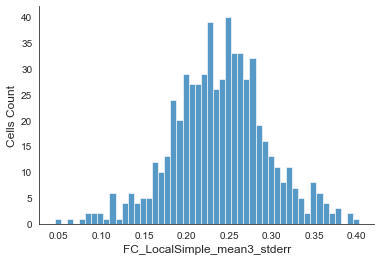

In [11]:
#Raw data distribution
values = features
for i in range(values.shape[1]):
    #plt.figure(dpi=300)
    sns.histplot(values.iloc[:,i],bins=50)
    sns.despine(top=True, right=True, left=False, bottom=False)
    sns.set_style('white')
    #plt.title(values.columns[i])
    plt.xlabel(values.columns[i],fontsize=12)
    plt.ylabel('Cells Count',fontsize=12)
    plt.show()

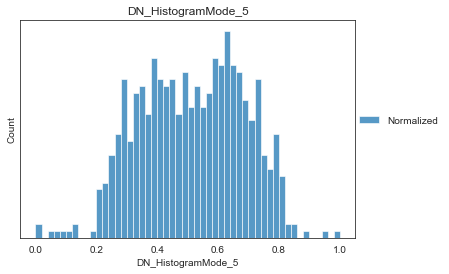

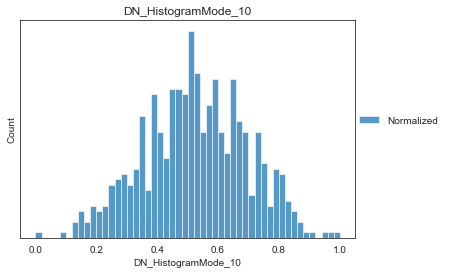

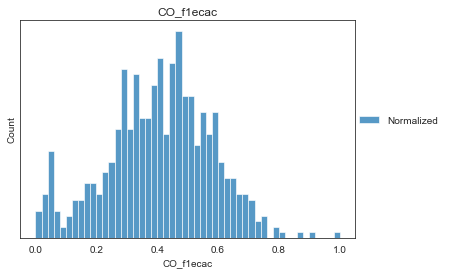

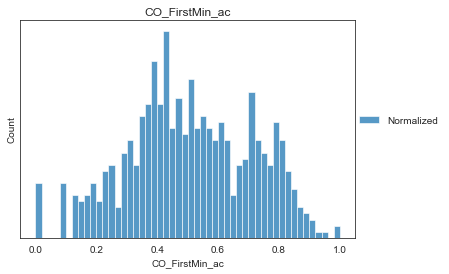

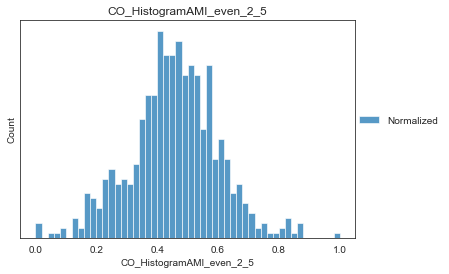

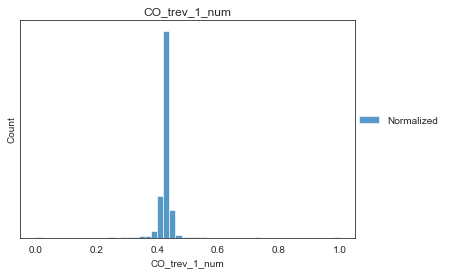

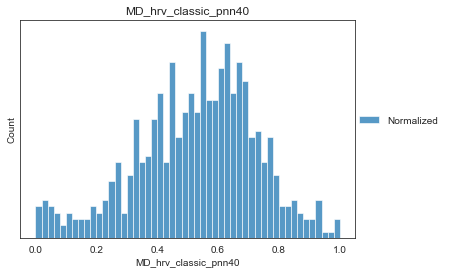

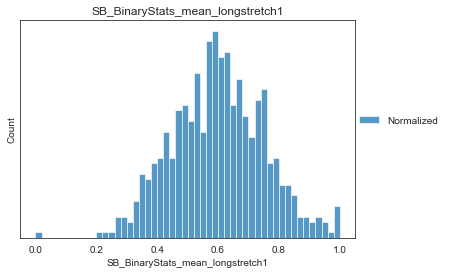

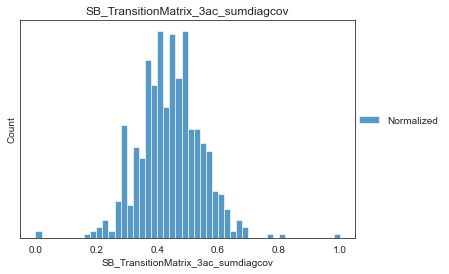

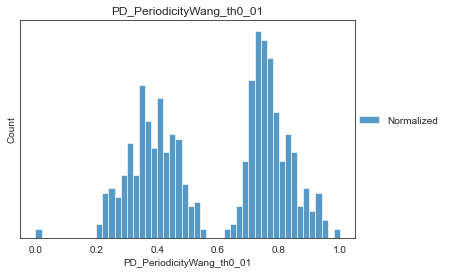

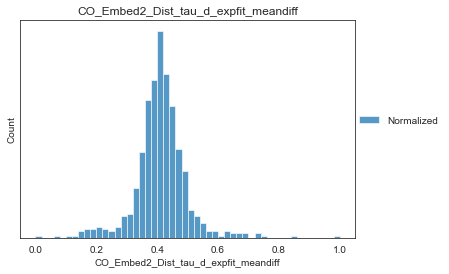

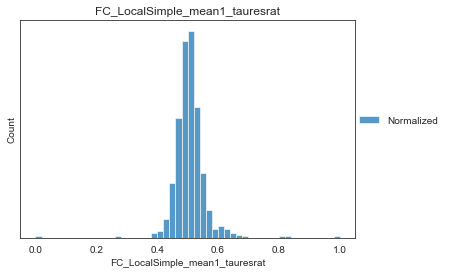

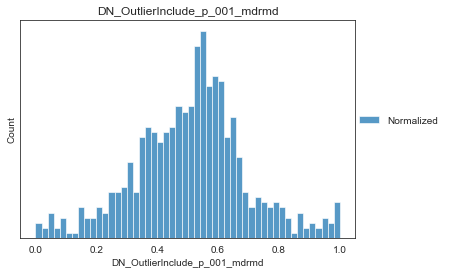

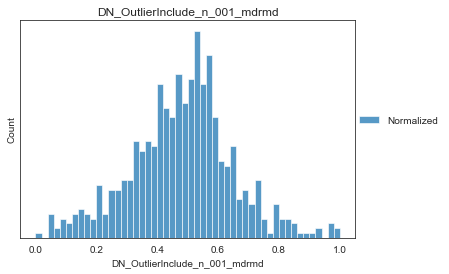

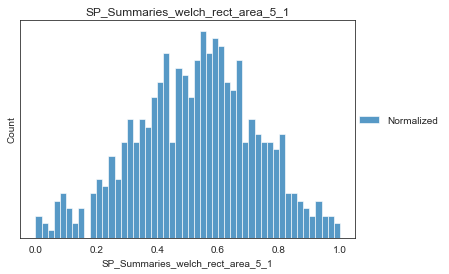

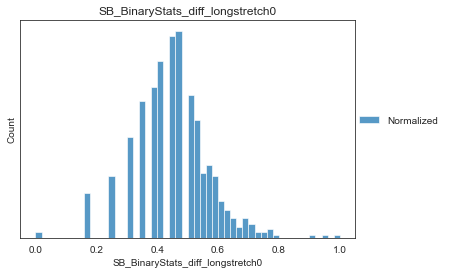

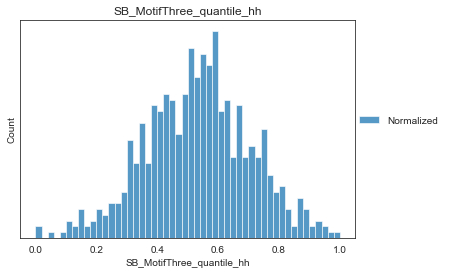

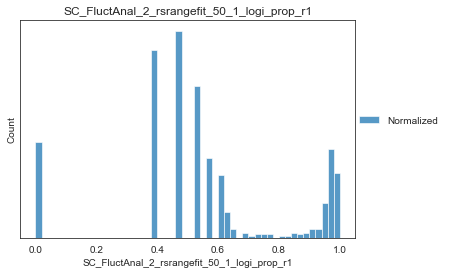

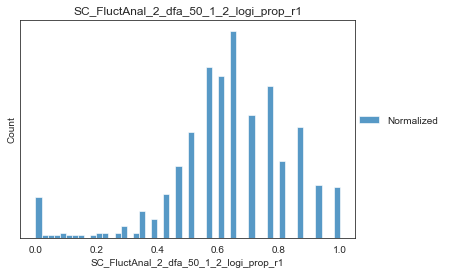

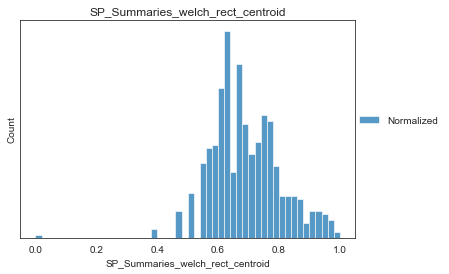

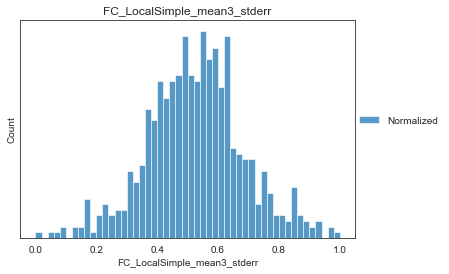

In [12]:
#Remove the least informative one    
f=values
f=f.drop(['IN_AutoMutualInfoStats_40_gaussian_fmmi'],axis=1)

#Normalization: Scale[0.0001,1]+Boxcox+Scale[0,1] and check the normalized distribution
import scipy.stats as spstats
min_max_scaler = MinMaxScaler(feature_range=(0.0001,1))
fb = min_max_scaler.fit_transform(f)
fb=pd.DataFrame(fb)

for i in range(f.shape[1]):
    feature=np.array(fb.iloc[:,i])
    l,opt_lambda=spstats.boxcox(feature)
    #print('Optimal lambda value:', opt_lambda)
    f.iloc[:,i]=spstats.boxcox(fb.iloc[:,i],lmbda=opt_lambda)

fb= MinMaxScaler(feature_range=(0,1)).fit_transform(f)
fb= pd.DataFrame(fb)
fb.columns=[x for x in values.columns if x != 'IN_AutoMutualInfoStats_40_gaussian_fmmi']

for i in range(fb.shape[1]):
    #plt.figure(dpi=600)
    #sns.kdeplot(f.iloc[:,i],label='Original')
    sns.histplot(fb.iloc[:,i],label='Normalized',bins=50)
    #sns.despine(top=True, right=True, left=False, bottom=False)
    sns.set_style('white')
    #plt.xticks([])
    plt.yticks([])
    plt.title(fb.columns[i])
    #plt.ylabel('Number')
    #plt.xlabel(fb.columns[i])
    #plt.savefig(fb.columns[i])
    plt.legend(loc=[1,0.5],frameon=False)
    plt.show()

In [14]:
#Try without deleting any traces
good_tcs = tcs
good_fb = fb
good_tcs.index = np.arange(tcs.shape[0])
good_fb.index = np.arange(fb.shape[0])

from sklearn.manifold import TSNE

tsne=TSNE(n_components=3)
new_tsne = pd.DataFrame(tsne.fit_transform(good_fb))

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


([], [])

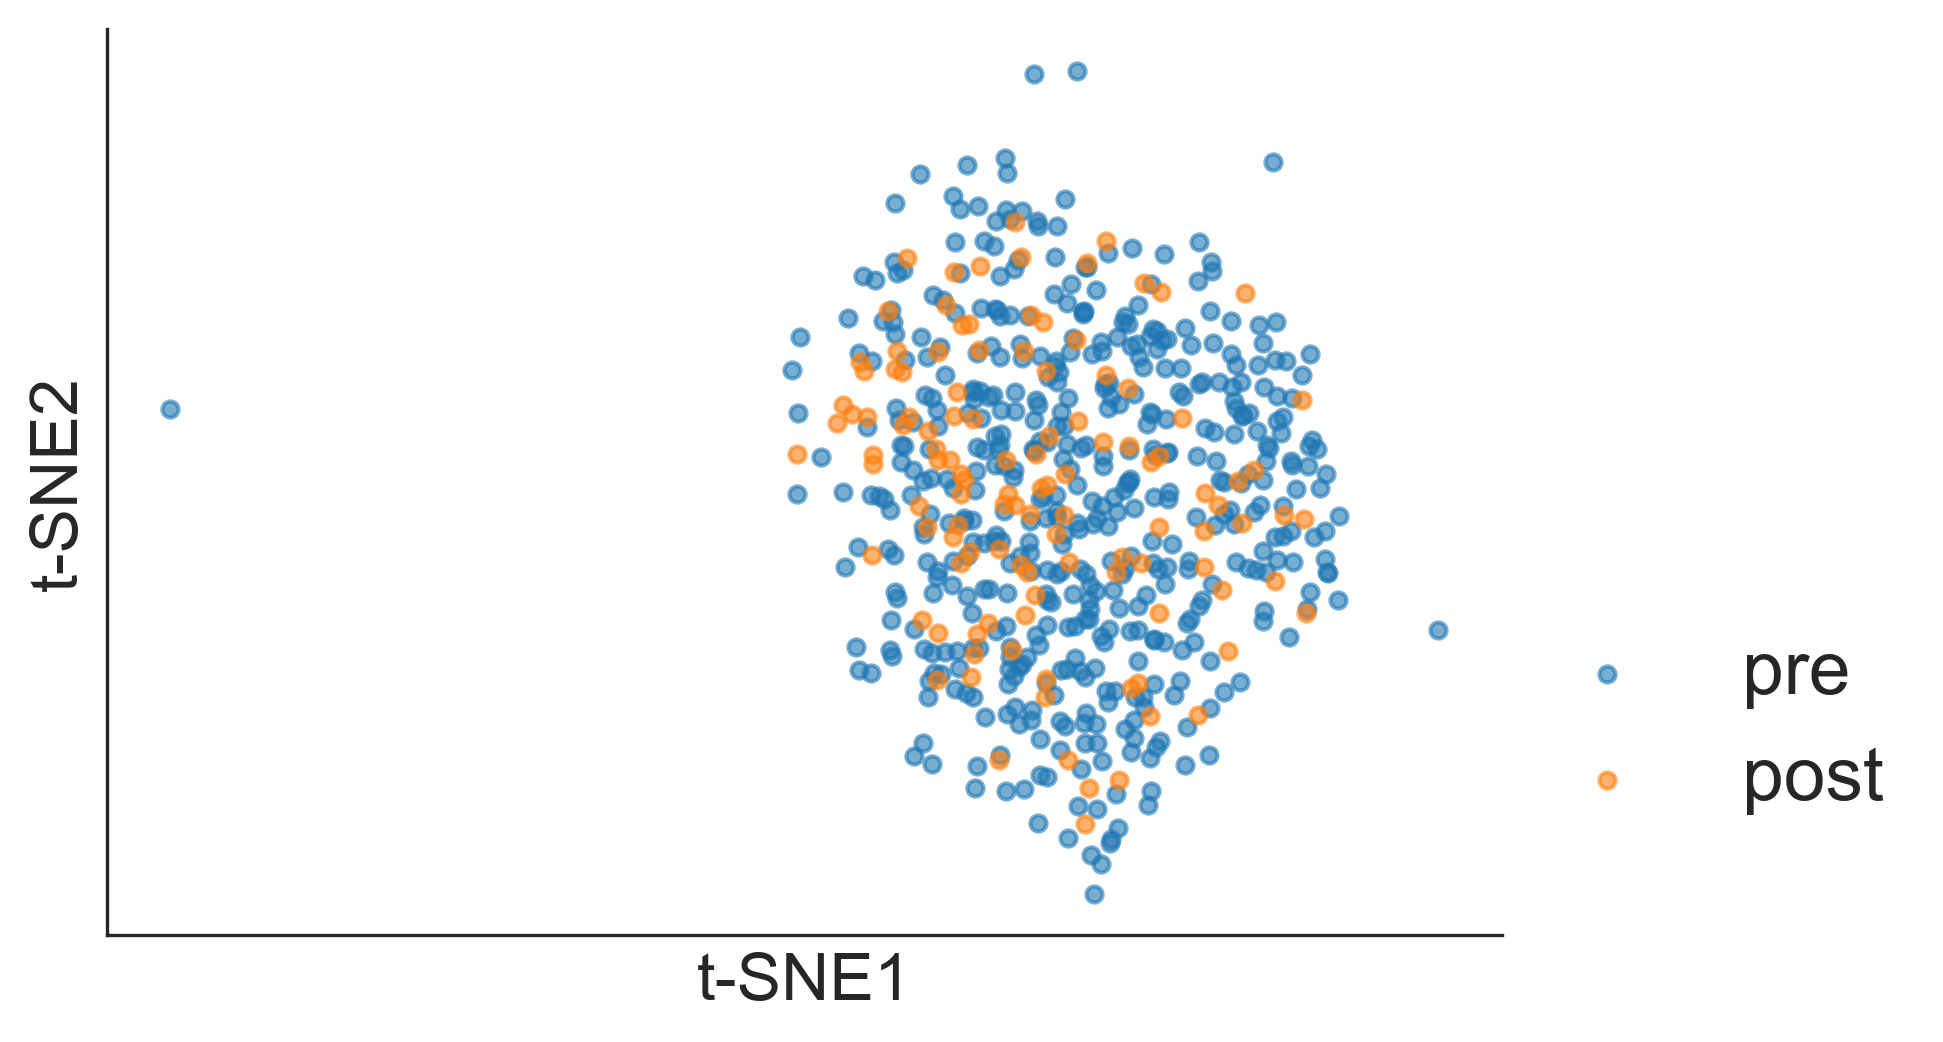

In [15]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot(111)
#color=['lightcoral','indianred','brown','maroon']

for l in tcs.stage.unique():
    t = new_tsne[good_tcs['stage'] == l]
    ax.scatter(t.iloc[:,0],t.iloc[:,1], label = l, marker = 'o',s = 15,alpha = 0.6)
#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
plt.xlabel(r't-SNE1',fontsize=16)  
plt.ylabel(r't-SNE2',fontsize=16)
plt.legend(fontsize=18,frameon=False,loc=[1,0.1])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks([])
plt.yticks([])
#plt.savefig('combine tsne space.eps',format='eps',dpi=600)
#plt.savefig('combine tsne space.png',dpi=600)

In [16]:
pca = PCA(n_components=0.8)
new_pca = pd.DataFrame(pca.fit_transform(good_fb))
importance = pca.explained_variance_ratio_
c=pca.components_

([], [])

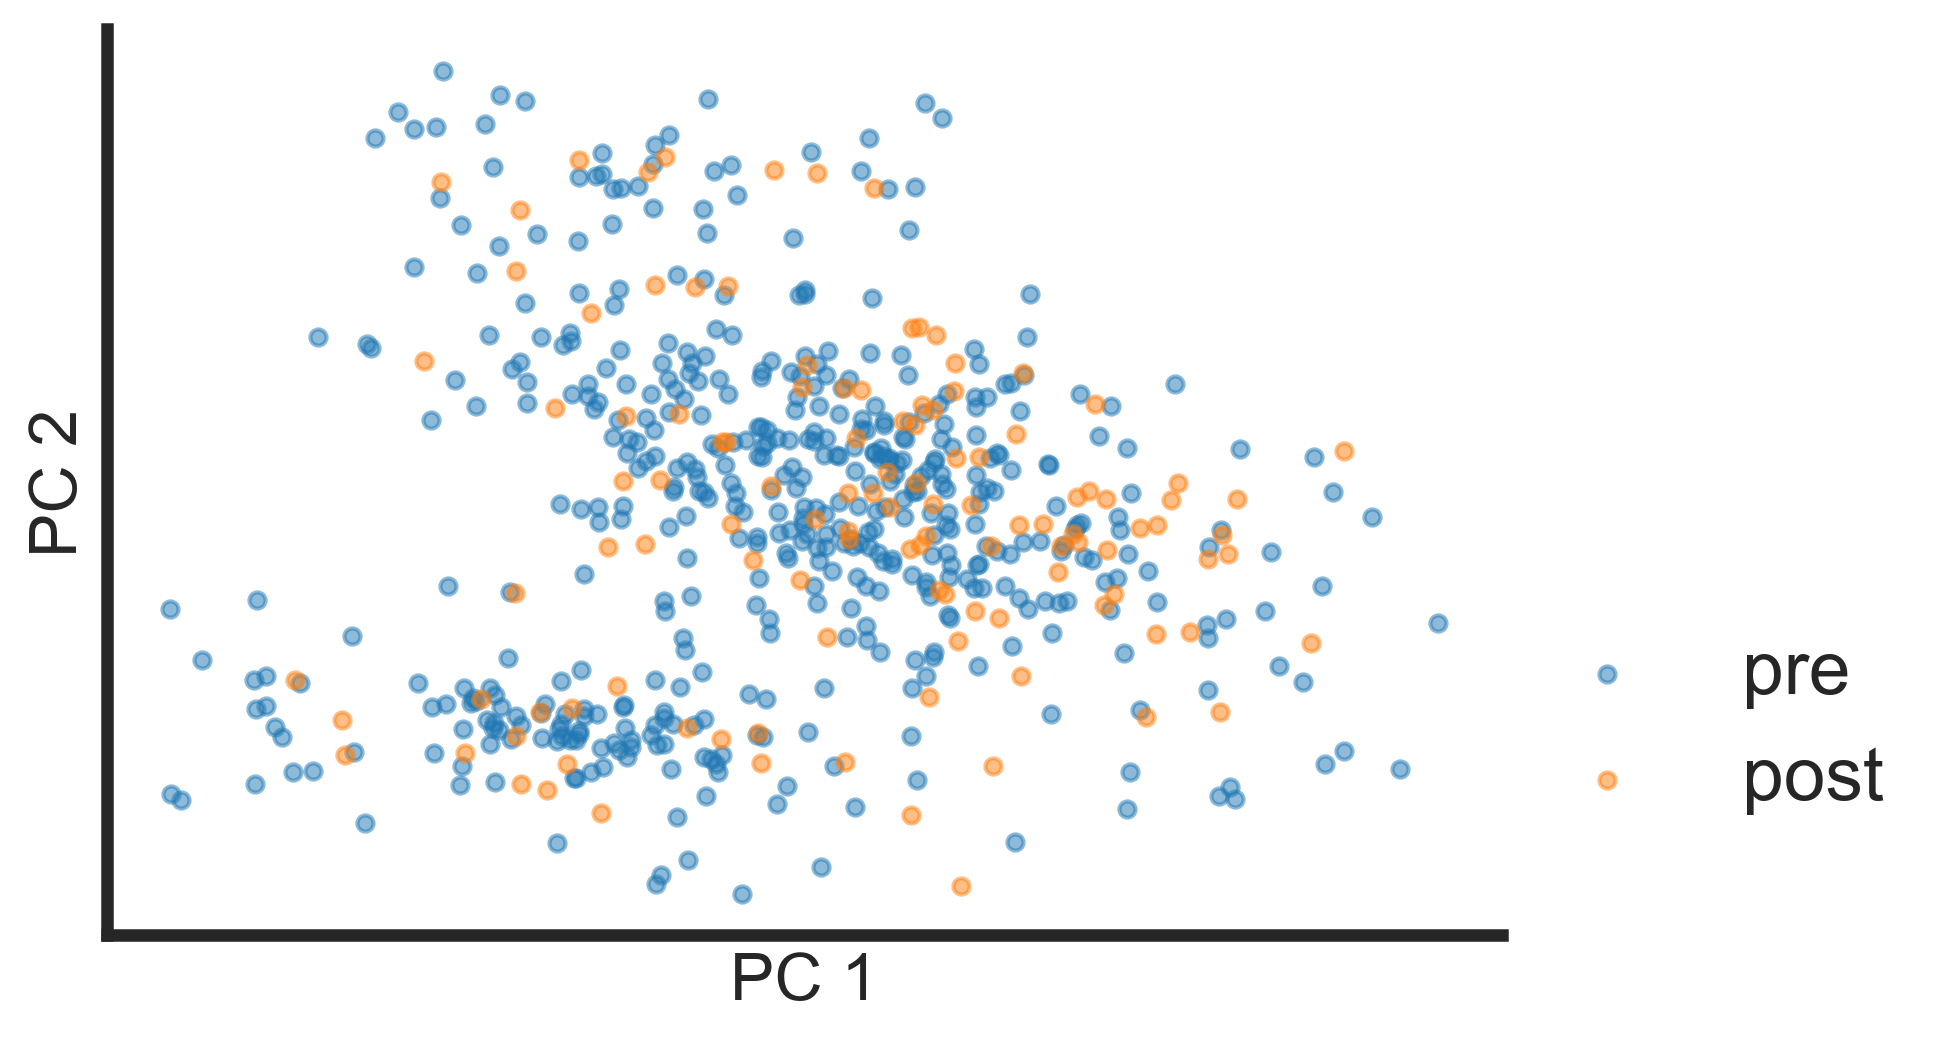

In [17]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot(111)
#color=['lightcoral','indianred','brown','maroon']

for l in tcs.stage.unique():
    t = new_pca[good_tcs['stage'] == l]
    ax.scatter(t.iloc[:,0],t.iloc[:,1], label = l, marker = 'o',s = 15,alpha = 0.5)
#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
kwargs={'linestyle':'-', 'lw':0.1, 'width':0.02} 
#for i in np.arange(c.shape[1]):
    #ax.arrow(0+1.5,0-1,c[0,i],c[1,i],alpha=0.5,ec='black',fc='black', **kwargs)
    #ax.text(c[0,i]+1.5,c[1,i]-1.1,f'{i+1}', ha="center", va="center",fontsize=14)
plt.xlabel(r'PC 1',fontsize=16)  
plt.ylabel(r'PC 2',fontsize=16)
plt.legend(fontsize=18,frameon=False,loc=[1,0.1])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks([])
plt.yticks([])
#plt.savefig('combine tsne space.eps',format='eps',dpi=600)
#plt.savefig('combine tsne space.png',dpi=600)

In [18]:
import umap
reducer = umap.UMAP(random_state=42,n_components=3)
new_umap = pd.DataFrame(reducer.fit_transform(good_fb))

([], [])

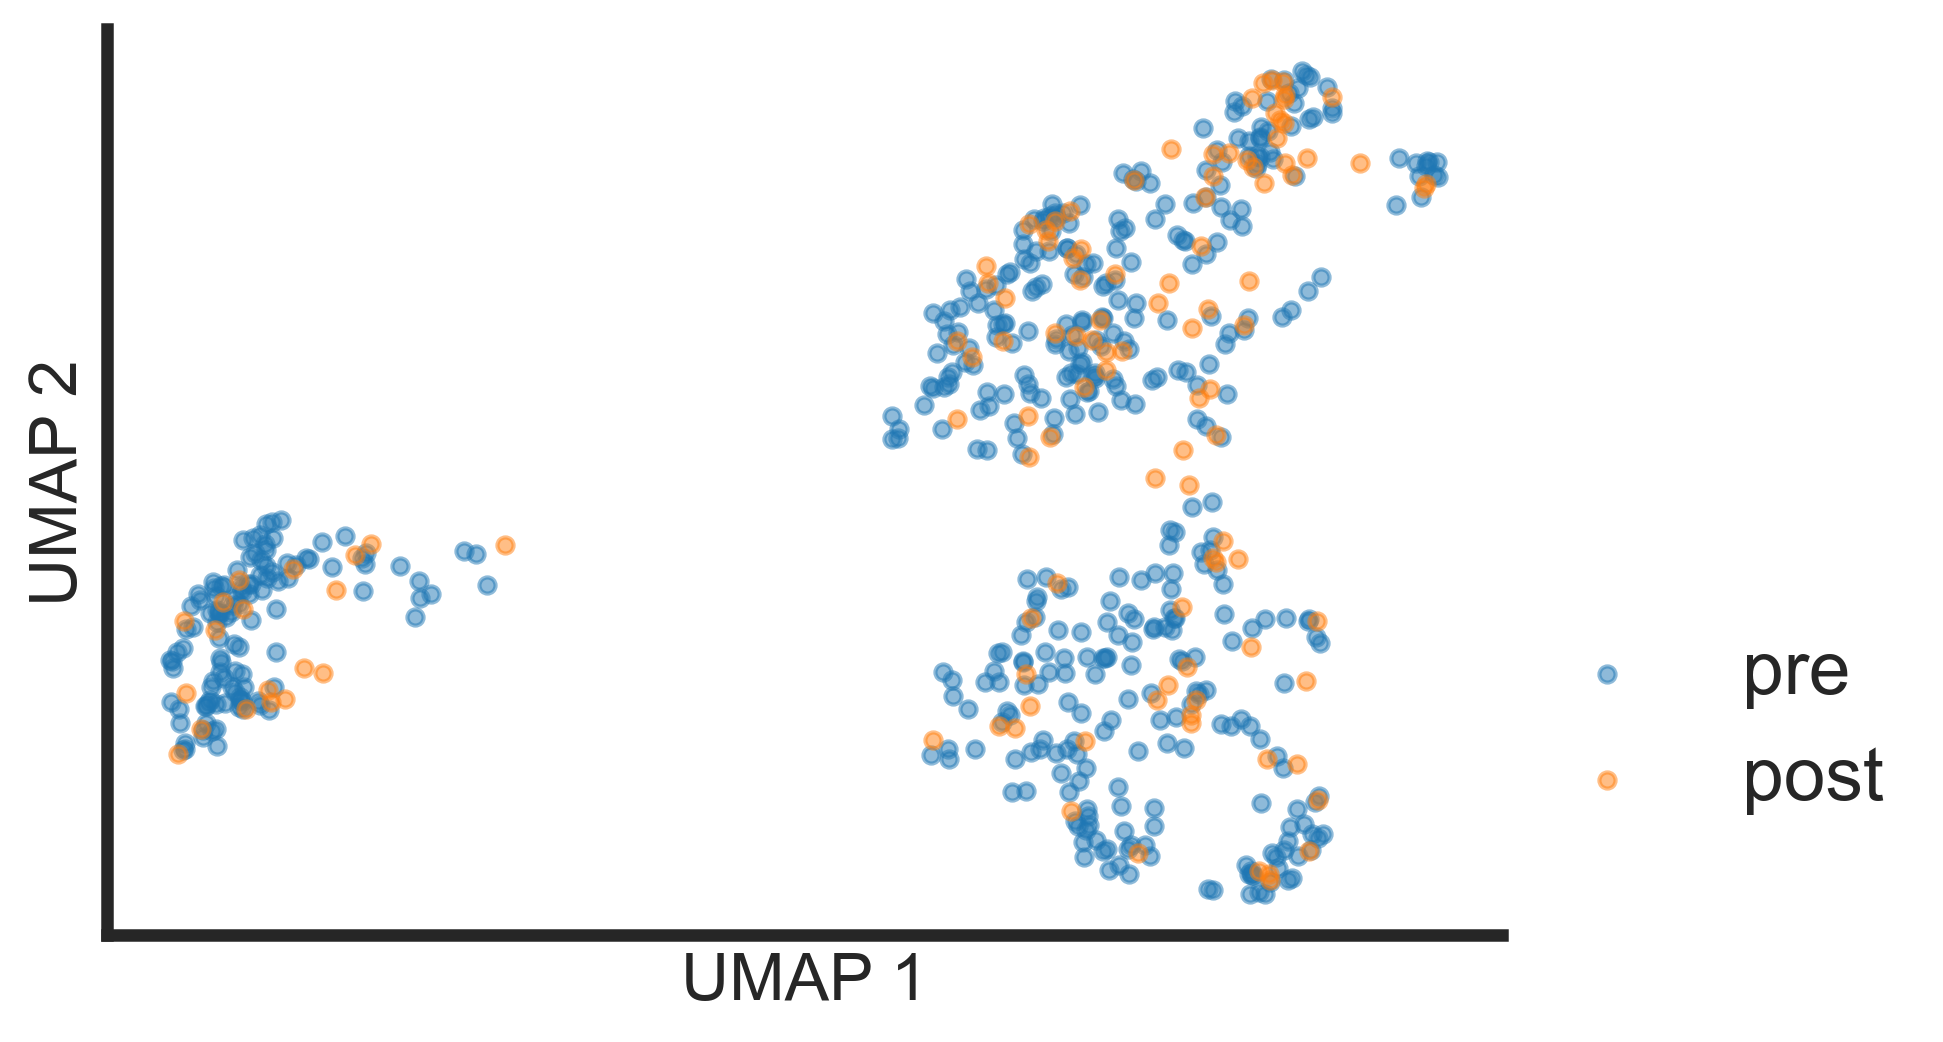

In [19]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot(111)
#color=['lightcoral','indianred','brown','maroon']

for l in tcs.stage.unique():
    t = new_umap[good_tcs['stage'] == l]
    ax.scatter(t.iloc[:,0],t.iloc[:,1], label = l, marker = 'o',s = 15,alpha = 0.5)
#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
plt.xlabel(r'UMAP 1',fontsize=16)  
plt.ylabel(r'UMAP 2',fontsize=16)
plt.legend(fontsize=18,frameon=False,loc=[1,0.1])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks([])
plt.yticks([])
#plt.savefig('combine tsne space.eps',format='eps',dpi=600)
#plt.savefig('combine tsne space.png',dpi=600)